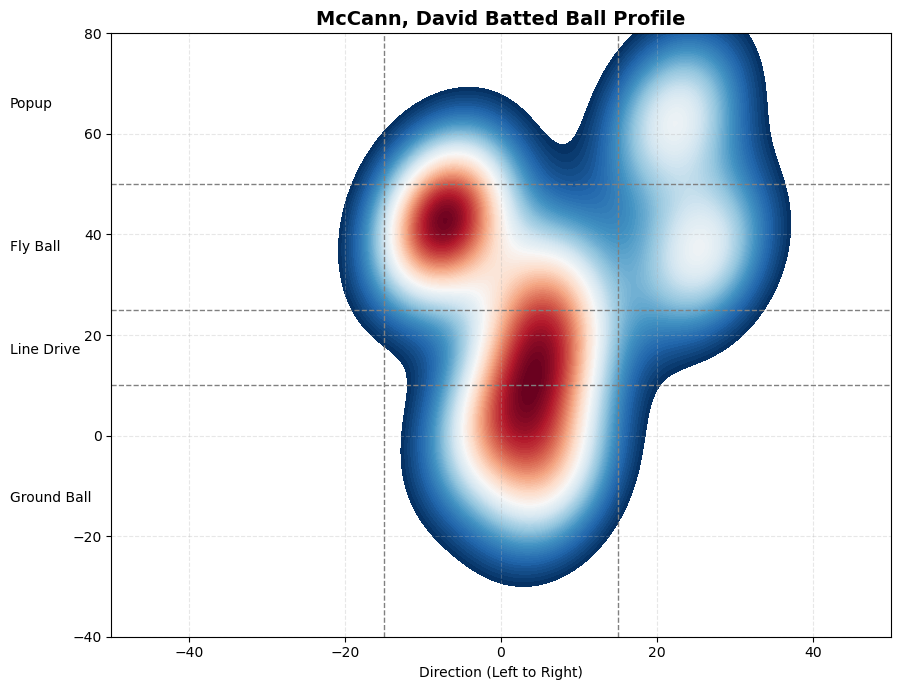

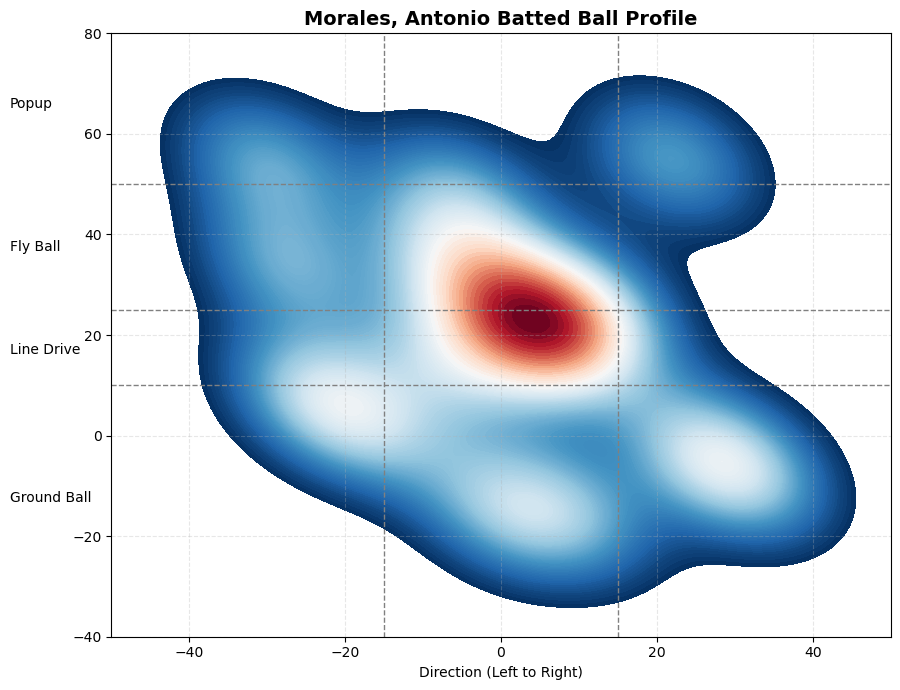

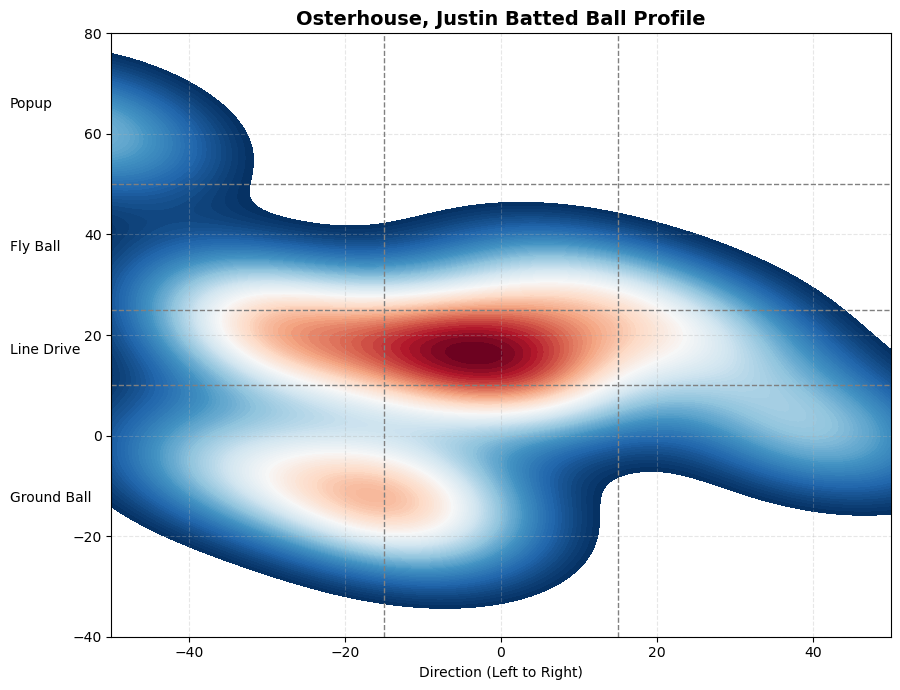

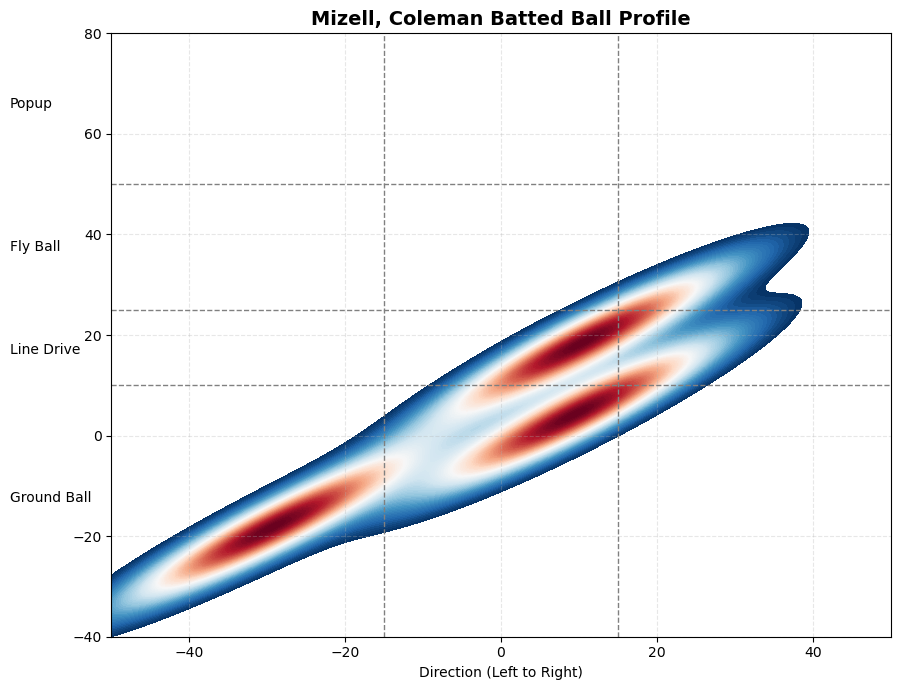

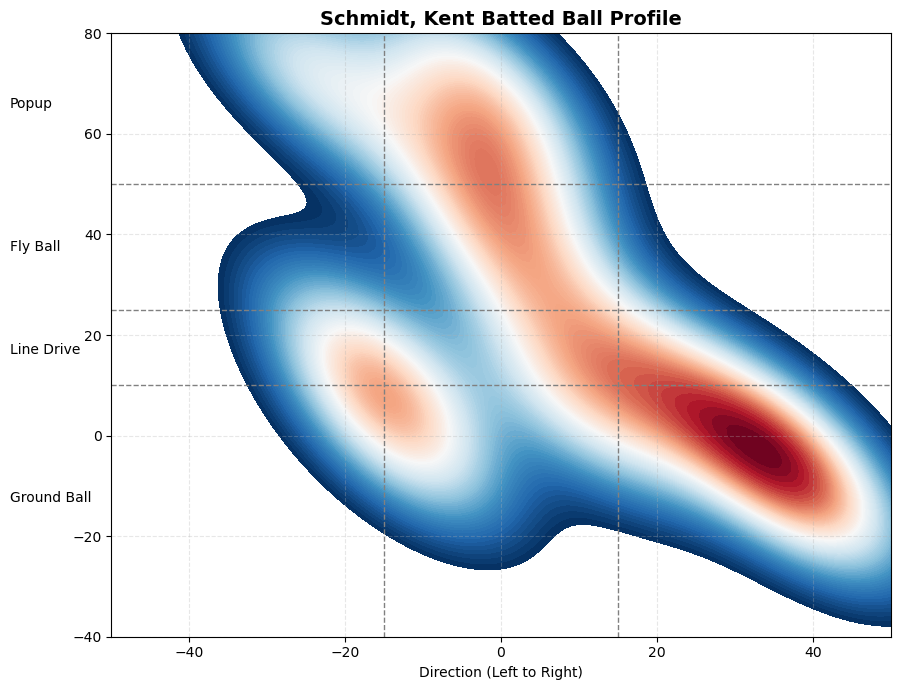

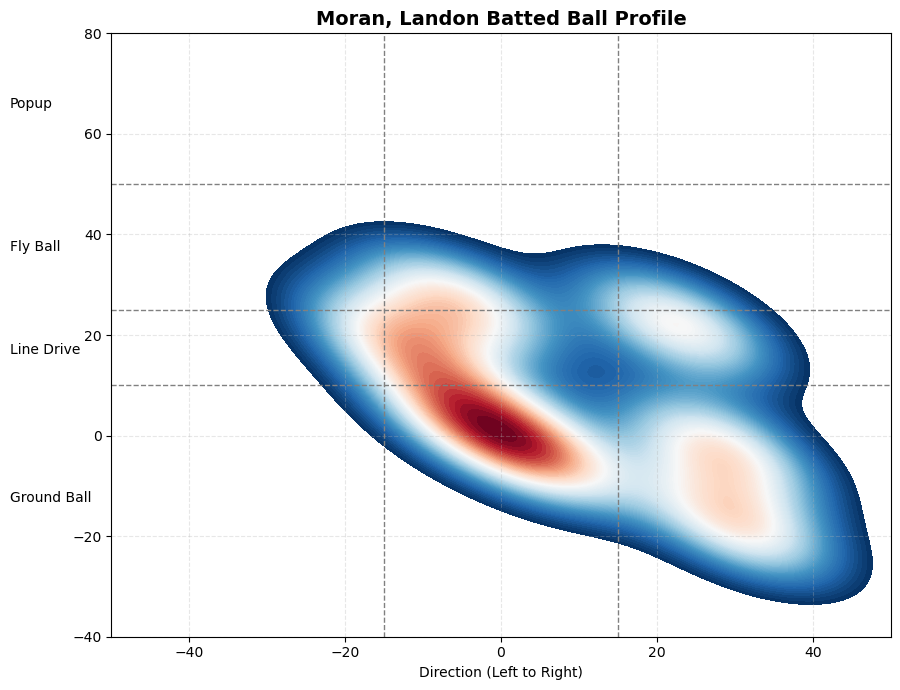

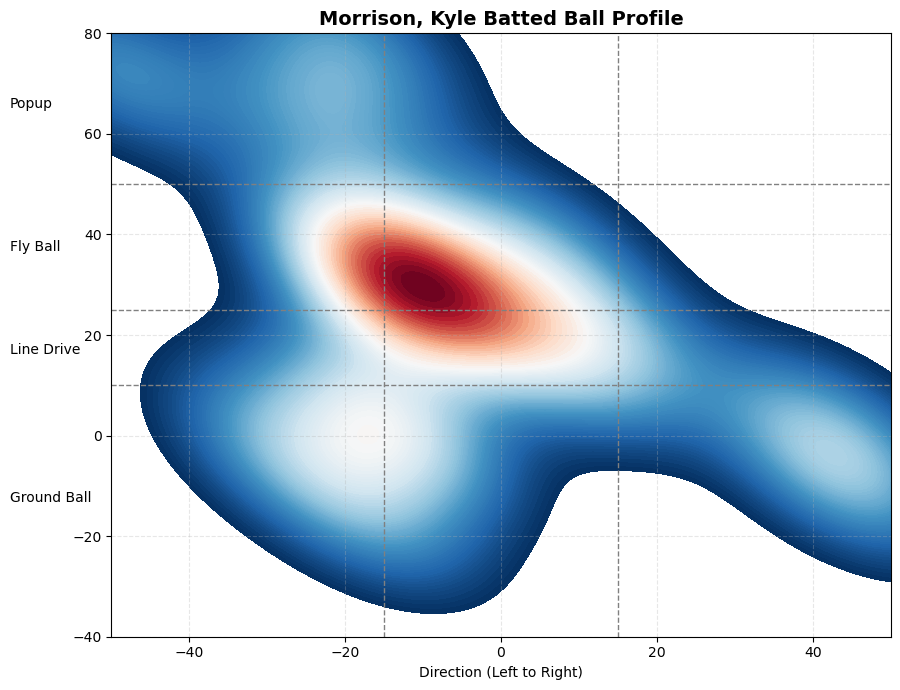

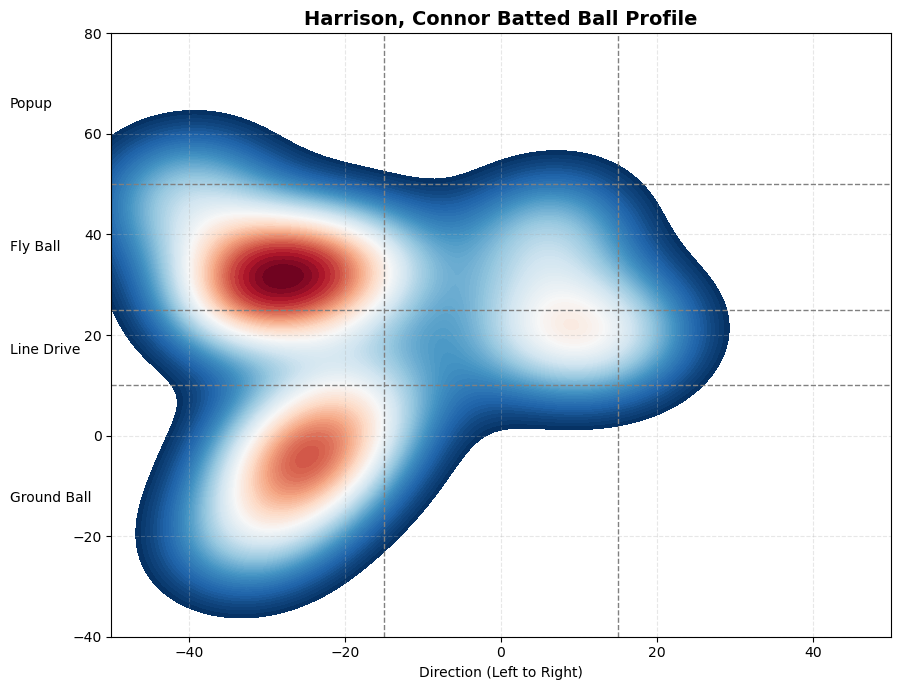

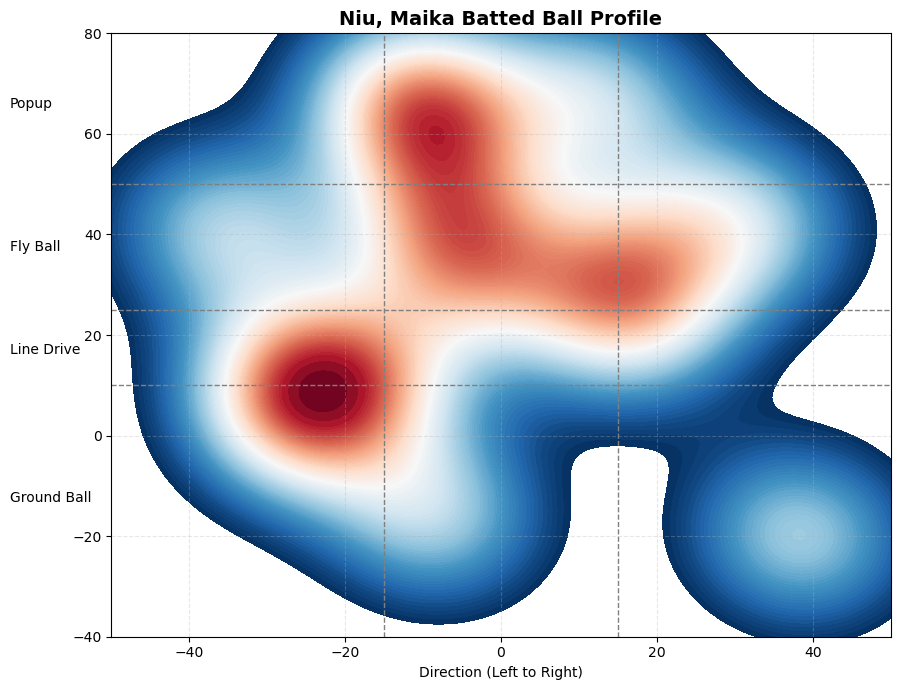

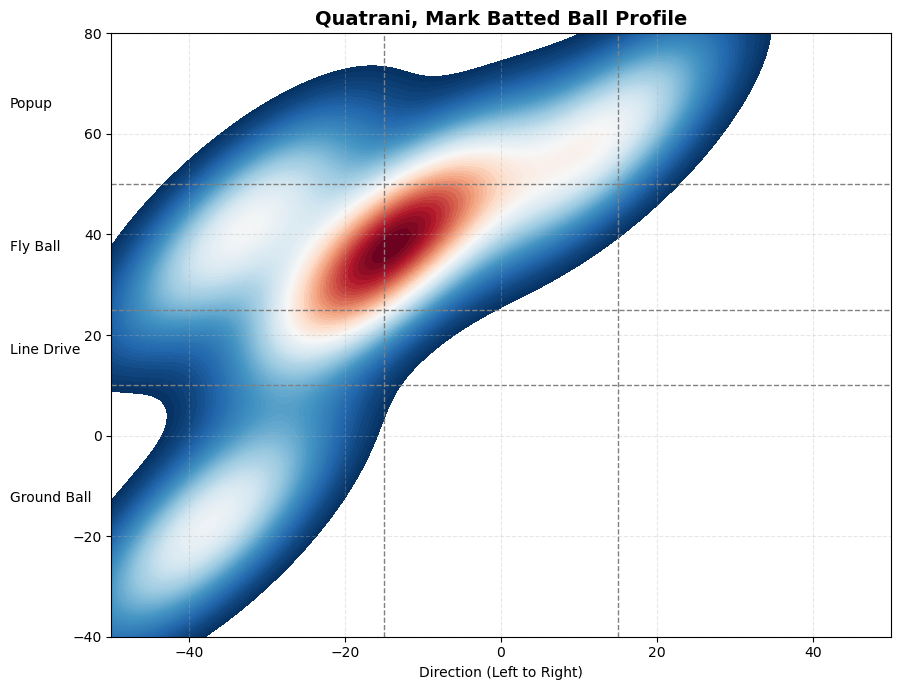

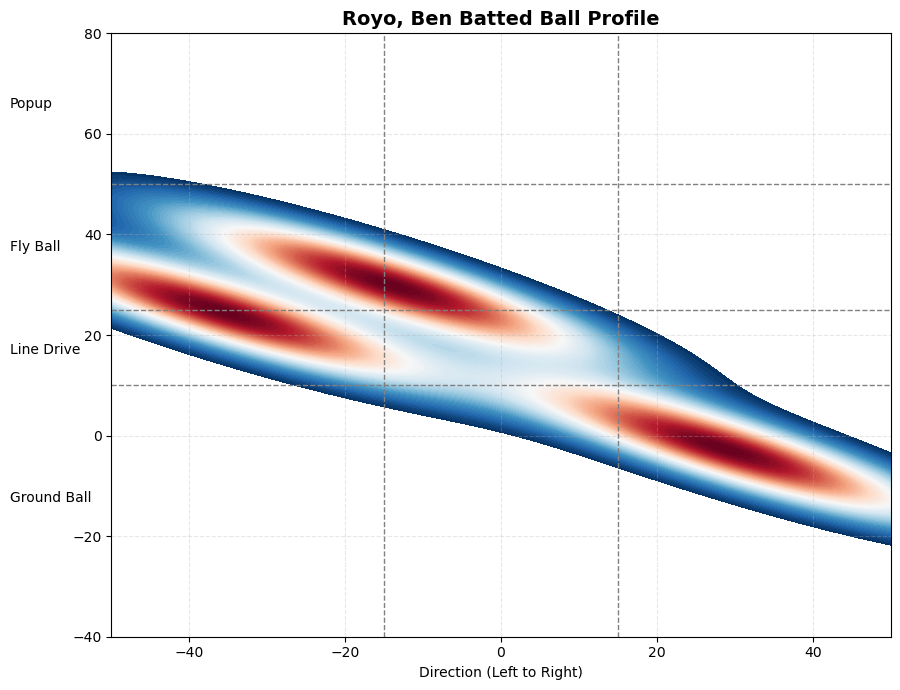

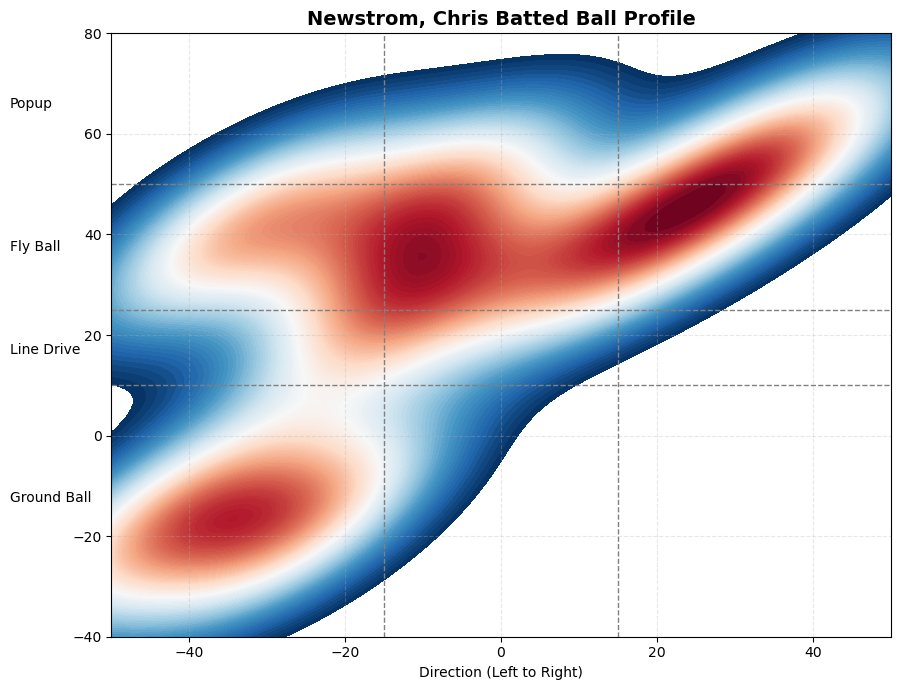

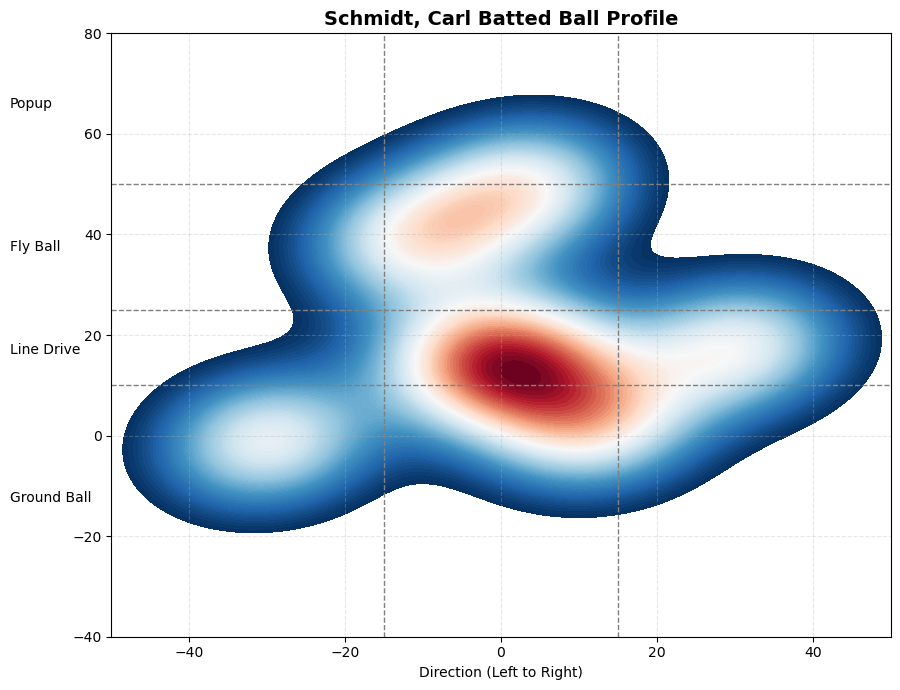

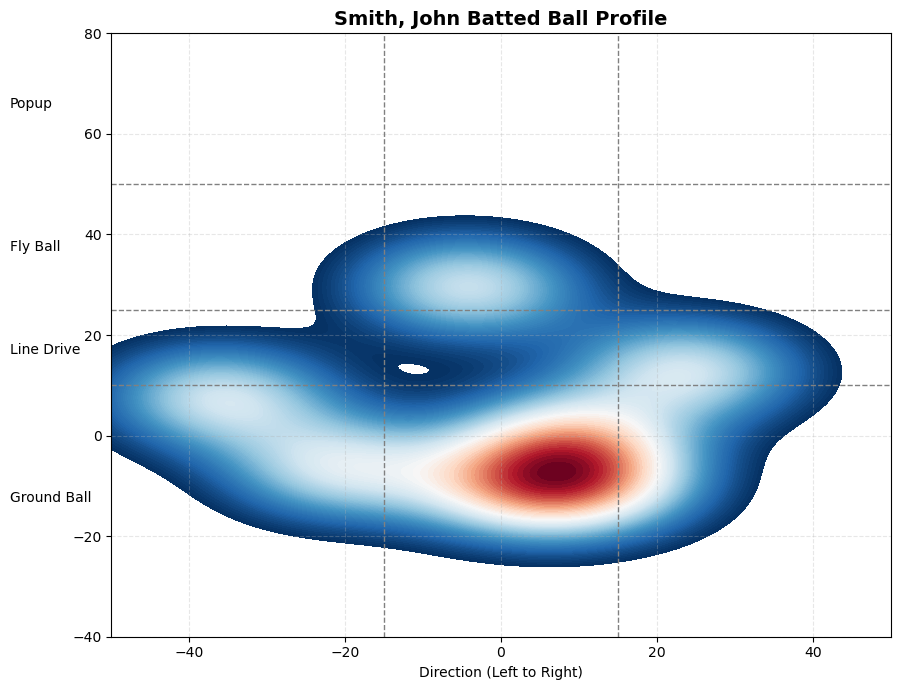

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\brend\OneDrive - Stonehill College\All Cape League Trackman.xlsx"
df = pd.read_excel(file_path)

df = df[df['BatterTeam'] == 'FAL_COM']
df = df[df['PitchCall'] != 'FoulBallNotFieldable']
df = df.dropna(subset=['Angle', 'Direction', 'Batter'])
df = df[(df['Angle'] >= -20) & (df['Angle'] <= 80) & (df['Direction'].between(-60, 60))]

batters = df['Batter'].unique()

for batter in batters:
    batter_df = df[df['Batter'] == batter]
    
    if len(batter_df) < 2:
        continue
    
    plt.figure(figsize=(9, 7))
    sns.kdeplot(
        data=batter_df, 
        x="Direction", 
        y="Angle", 
        fill=True, 
        cmap="RdBu_r", 
        bw_adjust=0.7, 
        thresh=0.05, 
        levels=100
    )

    plt.axhline(10, color='gray', linestyle='--', linewidth=1)
    plt.axhline(25, color='gray', linestyle='--', linewidth=1)
    plt.axhline(50, color='gray', linestyle='--', linewidth=1)
    plt.axvline(-15, color='gray', linestyle='--', linewidth=1)
    plt.axvline(15, color='gray', linestyle='--', linewidth=1)

    plt.text(-63, 66, "Popup", va='center', ha='left', fontsize=10, color='black')
    plt.text(-63, 37.5, "Fly Ball", va='center', ha='left', fontsize=10, color='black')
    plt.text(-63, 17, "Line Drive", va='center', ha='left', fontsize=10, color='black')
    plt.text(-63, -12.5, "Ground Ball", va='center', ha='left', fontsize=10, color='black')

    plt.xlim(-50, 50)
    plt.ylim(-40, 80)

    plt.title(f"{batter} Batted Ball Profile", fontsize=14, fontweight='bold')
    plt.xlabel("Direction (Left to Right)")
    plt.ylabel("")
    plt.grid(True, linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()